# Feature selection with WEKA

Author: Sandra Godinho Silva 

Last version: 0.5 (/20/10/2020)


In [1]:
%reload_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


Databases:
* COG
* Pfam
* KO
* BGC
* All

Attributes to use as class:
* Genus
* Origin
* MAG

Tables available:
* Counts
* Presence/absence
* Relative abundance



**Usefull links:**

https://fracpete.github.io/python-weka-wrapper/examples.html

https://fracpete.github.io/python-weka-wrapper3/api.html

https://python.hotexamples.com/examples/weka.classifiers/Classifier/build_classifier/python-classifier-build_classifier-method-examples.html

#Load dependencies

In [2]:
## Download all important packages
# pygraphviz
!wget https://anaconda.org/anaconda/pygraphviz/1.3/download/linux-64/pygraphviz-1.3-py36h14c3975_1.tar.bz2
!tar xvjf pygraphviz-1.3-py36h14c3975_1.tar.bz2
!cp -r lib/python3.6/site-packages/* /usr/local/lib/python3.6/dist-packages/
import pygraphviz

--2021-02-17 16:22:52--  https://anaconda.org/anaconda/pygraphviz/1.3/download/linux-64/pygraphviz-1.3-py36h14c3975_1.tar.bz2
Resolving anaconda.org (anaconda.org)... 104.17.92.24, 104.17.93.24, 2606:4700::6811:5d18, ...
Connecting to anaconda.org (anaconda.org)|104.17.92.24|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://binstar-cio-packages-prod.s3.amazonaws.com/5a38b7de000a2711f1345719/5e591e9c778a87708f0e3bf1?response-content-disposition=attachment%3B%20filename%3D%22pygraphviz-1.3-py36h14c3975_1.tar.bz2%22%3B%20filename%2A%3DUTF-8%27%27pygraphviz-1.3-py36h14c3975_1.tar.bz2&response-content-type=application%2Fx-tar&X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Expires=60&X-Amz-Date=20210217T162253Z&X-Amz-SignedHeaders=host&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEFQaCXVzLWVhc3QtMSJIMEYCIQCMy47g8V%2Bm8rZIdP%2FLlnfGU5qhDgltPULnf61Zd8W%2FwAIhAIJQqjLY9%2BEdVACxC0MMJ6AI5TDEhUiVUBr3FKQM%2Bb%2FaKrQDCF0QABoMNDU1ODY0MDk4Mzc4IgzMpdPFKuRTDWqvZbwqkQOaamG1gSAQt9Q1bp

In [3]:
%%bash
# Install deps from 
# https://github.com/mwydmuch/ViZDoom/blob/master/doc/Building.md#-linux
apt-get update
apt-get install build-essential zlib1g-dev libsdl2-dev libjpeg-dev \
nasm tar libbz2-dev libgtk2.0-dev cmake git libfluidsynth-dev libgme-dev \
libopenal-dev timidity libwildmidi-dev unzip

# Boost libraries
apt-get install libboost-all-dev

# Lua binding dependencies
apt-get install liblua5.1-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [49.0 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hi

In [4]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.10" 2021-01-19
OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


In [5]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install python-weka-wrapper3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following NEW packages will be installed:
  libproj-dev proj-bin
0 upgraded, 2 newly installed, 0 to remove and 32 not upgraded.
Need to get 232 kB of archives.
After this operation, 1,220 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 232 kB in 1s (205 kB/s)
Selecting previously unselected package libproj-dev:amd64.
(Reading database ... 149889 files and directories currently installed.)
Preparing to unpack .../libproj-dev_4.9.3-2_amd64.deb ...
Unpacking libproj-dev:amd64 (4.9.3-2) ...
Selecting previously unselected package proj-bin.
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.

In [6]:
import os
import traceback
import weka.core.jvm as jvm
from weka.core.classes import Random
from weka.core.converters import Loader
from weka.core.dataset import Instances
from weka.classifiers import Classifier, Evaluation
from weka.filters import Filter

## Importing Python libraries

In [7]:
import weka.core.jvm as jvm
jvm.start()

from weka.core.converters import Loader
from weka.core.classes import Random
from weka.classifiers import Classifier, Evaluation

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/usr/local/lib/python3.6/dist-packages/javabridge/jars/rhino-1.7R4.jar', '/usr/local/lib/python3.6/dist-packages/javabridge/jars/runnablequeue.jar', '/usr/local/lib/python3.6/dist-packages/javabridge/jars/cpython.jar', '/usr/local/lib/python3.6/dist-packages/weka/lib/python-weka-wrapper.jar', '/usr/local/lib/python3.6/dist-packages/weka/lib/weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


In [8]:
from itertools import *

In [9]:
import pandas as pd
import os

# Set default path

In [11]:
import os
#os.chdir("drive/Feature_selection/")
#os.chdir("/drive/My Drive/Chapter 3 - Flavobacteriaceae genomes/Data&Code/4_Machine_learning2/")
!ls

 all_abund_wt_metadata.csv
 all_abund_wt_metadata_flavo.csv
 all_abund_wt_metadata_origin_flavo.csv
 all_counts_wt_metadata.csv
 all_counts_wt_metadata_flavo.csv
 all_counts_wt_metadata_origin_flavo.csv
 all_PA_wt_metadata.csv
 all_PA_wt_metadata_flavo.csv
 all_PA_wt_metadata_origin_flavo.csv
 Caz_merops_counts.csv
 Caz_merops_counts_Genus_after_SubsetEval.csv
 Caz_merops_counts_Genus_FS.csv
 Caz_merops_counts_mag.csv
 Caz_merops_counts_mag_MAG_after_SubsetEval.csv
 Caz_merops_counts_origin.csv
 Caz_merops_counts_origin_Origin_after_SubsetEval.csv
 Caz_merops_PA.csv
 Caz_merops_PA_Genus_after_SubsetEval.csv
 Caz_merops_PA_Genus_FS.csv
 Caz_merops_PA_mag.csv
 Caz_merops_PA_mag_MAG_after_SubsetEval.csv
 Caz_merops_PA_origin.csv
 Caz_merops_PA_origin_Origin_after_SubsetEval.csv
 Cazyme_abund_wt_metadata.csv
 Cazyme_abund_wt_metadata_flavo.csv
 Cazyme_abund_wt_metadata_origin_flavo.csv
 Cazyme_counts_wt_metadata.csv
 Cazyme_counts_wt_metadata_flavo.csv
 Cazyme_counts_wt_metadata_origin_fla

### Load dataframes for saving data

In [12]:
def LoadDatasetEvolution():
  import pandas as pd
  df_evolution = pd.read_csv("FeatureSelection/Security_evolution.csv")
  return df_evolution

### Load the dataset

In [13]:
from weka.core.converters import Loader

def LoadDataset(file, i):
  print("Loading dataset")
  loader = Loader(classname="weka.core.converters.CSVLoader")
  data_file = file
  data = loader.load_file(data_file)

  print('Sample size: ', data.num_instances)
  print('Sample size: ', data.num_attributes)
  
  name_dataset = str(file).split(".")[0]
  print(name_dataset)

  #name dataset
  df_evolution["Dataset"].iloc[i]=name_dataset
  df_evolution["Dataset"].iloc[i+1]=name_dataset
  df_evolution["Beginning"].iloc[i]=data.num_instances
  df_evolution["Beginning"].iloc[i+1]=data.num_attributes

  return data, name_dataset

### Preprocessing


In [14]:
from weka.filters import Filter

def FirstPreprocessing(data, i, att_class):
  print("")
  print("Attribute to use as class: " + str(att_class))
  print("Preprocess number 1")

  df_evolution["Class"].iloc[i]=att_class 
  df_evolution["Class"].iloc[i+1]=att_class 

  if att_class == "Genus":
    l = ["index", "Family", "Bin_Id", "Unnamed: 0", "Origin", "orfs", "Genome_ID", "Genomes", "Genome", "Assembly", "Assembly accession", "MAG"]

  if att_class == "Family":
    l = ["index", "Genus", "Bin_Id", "Unnamed: 0", "Origin", "orfs", "Genome_ID", "Genomes", "Genome", "Assembly", "Assembly accession", "MAG"]

  elif att_class == "Origin":
    l = ["index", "Family", "Bin_Id", "Unnamed: 0", "Genus", "orfs","Genome_ID", "Genomes", "Genome", "Assembly", "Assembly accession", "MAG"]

  elif att_class == "MAG":
    l = ["index", "Family", "Bin_Id", "Unnamed: 0", "Genus", "orfs","Genome_ID", "Genomes", "Genome", "Assembly", "Assembly accession", "Origin"]

  for x in l:
    #Remove attribute by name
    remove = Filter(classname="weka.filters.unsupervised.attribute.RemoveByName", options=["-E",str(x)])
    remove.inputformat(data)     # let the filter know about the type of data to filter
    data = remove.filter(data)  # filter the data
  
  print('Sample size: ', data.num_instances)
  print('Sample size: ', data.num_attributes)
  
  return data

In [15]:
from weka.filters import Filter

def SecondPreprocessing(data, i, class_):
  print("") 
  print("Preprocess number 2") 
  
  if class_ == "Genus":
    # Change number to position of last column
    last_column = data.num_attributes

    #Merge values in Genus attribute with less than 8 instances
    remove = Filter(classname="weka.filters.unsupervised.attribute.MergeInfrequentNominalValues", options=["-N", "8", "-R",str(last_column)])
    remove.inputformat(data)     # let the filter know about the type of data to filter
    filtered = remove.filter(data)  # filter the data

    #Remove merged group from last step
    remove = Filter(classname="weka.filters.unsupervised.instance.RemoveWithValues", options=["-S", "0.0", "-C",str(last_column), "-L", "1"])
    remove.inputformat(filtered)     # let the filter know about the type of data to filter
    filtered = remove.filter(filtered)  # filter the data

    #Remove merged group from last step
    remove = Filter(classname="weka.filters.unsupervised.attribute.MergeManyValues", options=["-C","last","-L","Flavobacterium","-R","1,2"])
    remove.inputformat(filtered)     # let the filter know about the type of data to filter
    filtered = remove.filter(filtered)  # filter the data
    data = filtered
  
  elif class_ == "Family":
    #Change number to position of last column
    last_column = data.num_attributes

  elif class_ == "Origin":
    #Change number to position of last column
    last_column = data.num_attributes

  elif class_ == "MAG":
    #Change number to position of last column
    last_column = data.num_attributes
    
  print('Sample size: ', data.num_instances)
  print('Sample size: ', data.num_attributes)

  df_evolution["After pre-processing"].iloc[i]=data.num_instances
  df_evolution["After pre-processing"].iloc[i+1]=data.num_attributes

  return data

### Choose class: Genus

In [16]:
def SelectClass(data):
  print("")
  print("Defining last attribute as class")
  last_column = data.num_attributes
  #We choose to classify on the nominal atrribute Genus. We first split our dataset to train and test, with a 80% to the train split.
  print('Classifying on: ', data.attribute(last_column - 1))
  data.class_index = last_column - 1
  return data

### Feature selection

In [17]:
def LoaderSubsetEval(data, i, name_dataset, class_):
  file = name_dataset + "_" + class_ +"_after_SubsetEval.csv"
  if file in os.listdir():
    print("Loading output from SubsetEval to save time: " + str(file))
    from weka.core.converters import Loader
    loader = Loader(classname="weka.core.converters.CSVLoader")
    data_file = file
    data = loader.load_file(data_file)

    print('Sample size: ', data.num_instances)
    print('Sample size: ', data.num_attributes)

    last_column = data.num_attributes
    data.class_index = last_column - 1
    print('Classifying on: ', data.attribute(last_column - 1))

    df_evolution["CfsSubsetEval"].iloc[i]=data.num_instances
    df_evolution["CfsSubsetEval"].iloc[i+1]=data.num_attributes
  
  else: 
    data = AttributeSelectionSubsetEval(data, i, name_dataset, class_)

  return data

In [18]:
def AttributeSelectionSubsetEval(data, i, name_dataset, class_):
  """
  evaluator: CfsSubsetEval
  Evaluates the worth of a subset of attributes by considering the individual predictive ability of each feature along with the degree of redundancy between them.
  Subsets of features that are highly correlated with the class while having low intercorrelation are preferred.

  search: BestFirst
  """  
  print("")
  print("Attribute Selection by CfsSubsetEval")
  from weka.filters import Filter
  remove = Filter(classname="weka.filters.supervised.attribute.AttributeSelection", options=["-E","weka.attributeSelection.CfsSubsetEval -P 1 -E 1", 
                                                                                             "-S", "weka.attributeSelection.BestFirst -D 1 -N 5"])
  remove.inputformat(data)
  filtered = remove.filter(data)
  print('Sample size: ', filtered.num_instances)
  print('Sample size: ', filtered.num_attributes)
  data = filtered

  output= name_dataset + "_" + class_ +"_after_SubsetEval.csv"
  # Save filtered dataset into csv file - backup
  from weka.core.converters import Saver
  saver = Saver(classname="weka.core.converters.CSVSaver")
  saver.save_file(data, output)

  df_evolution["CfsSubsetEval"].iloc[i]=data.num_instances
  df_evolution["CfsSubsetEval"].iloc[i+1]=data.num_attributes

  last_column = data.num_attributes
  #We choose to classify on the nominal atrribute Genus. We first split our dataset to train and test, with a 80% to the train split.
  print('Classifying on: ', data.attribute(last_column - 1))
  data.class_index = last_column - 1

  return data

In [19]:
def GetOptimal(i):
  print("Getting parameters from Feature_selection_correct.csv")
  optimal = {}
  optimal["threshold"] = int(right["Parameters"].iloc[i])
  optimal["nr_features"] = int(right["Parameters"].iloc[i+1])
  print("Threshold: " + str(optimal["threshold"]))
  print("Nr features: " + str(optimal["nr_features"]))
  return optimal

In [20]:
def AttributeSelectionInfoGain(data, threshold):
  """
  evaluator: InfoGainAttributeEval
  Evaluates the worth of an attribute by measuring the information gain with respect to the class.
  InfoGain(Class,Attribute) = H(Class) - H(Class | Attribute).
  
  search: Ranker
  """
  print("Attribute Selection by InfoGain. Threshold: " +str(threshold))
  from weka.filters import Filter
  remove = Filter(classname="weka.filters.supervised.attribute.AttributeSelection",\
                         options=["-S", "weka.attributeSelection.Ranker -T {} -N -1".format(str(threshold)), #T: threshold 
                                  "-E", "weka.attributeSelection.InfoGainAttributeEval"])
  remove.inputformat(data)
  filtered = remove.filter(data)
  
  print('Sample size: ', filtered.num_instances)
  print('Sample size: ', filtered.num_attributes)
  n_att = filtered.num_attributes
  
  return filtered, n_att

### Classifier - Random Forest


In [21]:
def Classifier(data, nfeatures):
  #set Train and Test data
  from weka.filters import Filter
  remove = Filter(classname="weka.filters.supervised.instance.Resample",\
                         options=["-B", "0.0", "-S", "1", "-Z", "80", "-no-replacement"])
  remove.inputformat(data)
  train = remove.filter(data)
  print('Train size: ', train.num_instances)
  print('Train size: ', train.num_attributes)
  remove = Filter(classname="weka.filters.supervised.instance.Resample",\
                         options=["-B", "0.0", "-S", "1", "-Z", "80", "-no-replacement", "-V"])
  remove.inputformat(data)
  test = remove.filter(data)
  print('Test size: ', test.num_instances)
  print('Test size: ', test.num_attributes)

  from weka.classifiers import Classifier, Evaluation, PredictionOutput
  #Train the classifier
  cls = Classifier(classname="weka.classifiers.trees.RandomForest", options=["-P","100","-attribute-importance","-K",str(nfeatures)])
  cls.build_classifier(train)

  # Evaluating the classifier
  # cross-validation
  evlCV = Evaluation(train)
  evlCV.crossvalidate_model(cls, train, 10, Random(1))#, output=pred_output)
  print(evlCV.summary(title="cross-validation"))
  #print(pout.buffer_content())

  # evaluate the built model on the test set
  evlTest = Evaluation(test)
  evlTest.test_model(cls, test)
  print(evlTest.summary(title="test"))

  return evlTest, evlCV

### Select better threshold and number of features
https://github.com/fracpete/python-weka-wrapper-examples/blob/eeb012f21e8d2cbd936209c82a5dbb244c0c3ae1/src/wekaexamples/classifiers/classifiers.py

In [22]:
def SelectionOptimalParam(data, i, class_):
  """
  -K <number of attributes> \
  # Number of attributes to randomly investigate. (default 0) 
  """
  print("")
  print("Selecting best parameters")
  
  if class_ == "Genus":
    threshold_list=[0.0, 0.10, 0.20, 0.30, 0.40,0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99]
    nr_features_list = [1, 3, 5, 7, 9, 11, 13]
  elif class_ == "Origin":
    threshold_list=[0.0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]
    nr_features_list = [1, 3, 5, 7, 9, 11, 13]
  elif class_ == "MAG":
    threshold_list=[0.0, 0.10, 0.20, 0.30, 0.40,0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99]
    nr_features_list = [1, 3, 5, 7, 9, 11, 13]

  threshold_eval = {}
  feature_eval = {}
  feature_eval_backupf_measure = {}
  d={}
  d2 = {}
  d3_f = {}
  optimal={}

  for t in threshold_list:
    print("")
    print("Threshold: " + str(t))
    data_AS, n_att = AttributeSelectionInfoGain(data, t)
    feature_eval = {}
    d2[t] = []
    d2[t].append(n_att)
    d3_f[t] = []
    d3_f[t].append(n_att)
    for f in nr_features_list:
      print("Number of features: " + str(f))
      evl, evlCV = Classifier(data_AS, f)
      last_column = data_AS.num_attributes
      feature_eval[f] = evl.percent_correct 
      feature_eval_backupf_measure[f] = evlCV.weighted_f_measure
      print("Accuracy: " + str(evl.percent_correct))
      print("Weighted recall: " + str(evl.weighted_recall))
      print("F-measure: " + str(evlCV.weighted_f_measure))
      d2[t].append(feature_eval[f]) #accuracy of test
      d3_f[t].append(feature_eval_backupf_measure[f]) #f-measure of cross-validation
    #best_feature_nr = str(max(feature_eval, key=feature_eval.get)) # accuracy as metric
    best_feature_nr = str(max(feature_eval_backupf_measure, key=feature_eval_backupf_measure.get)) #f-masure as metric
    d[t] = best_feature_nr
    threshold_eval[t] = str(feature_eval[int(best_feature_nr)])
    #print("Number features with better results for threshold " + str(t) + ": " + best_feature_nr +" with " + str(threshold_eval[t]) + " F-measure.")
    #print("-----------------------")

  print("Conclusions: ")
  better_threshold = str(max(threshold_eval, key=threshold_eval.get))
  optimal["threshold"] = better_threshold
  optimal["nr_features"] = d[float(better_threshold)]
  print("Threshold with better results: " + better_threshold + " with " + str(threshold_eval[float(better_threshold)]) +" F-measure " + "for " + d[float(better_threshold)] + " number of features.")
  
  df_evolution["Parameters"].iloc[i]=better_threshold
  df_evolution["Parameters"].iloc[i+1]=d[float(better_threshold)]

  return d2, d3_f, optimal

In [23]:
def PlotOptimalParam(d2, att_class):
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt

  df = pd.DataFrame.from_dict(d2, orient='index', columns=["Nr_attributes",'1','3','5', '7', '9', '11', '13'])
  
  #df.to_csv("COG_selector_function_output.csv")
  #df =pd.read_csv("COG_selector_function_output.csv")
  #df.set_index("Unnamed: 0",inplace=True)

  df2 = df.drop(columns=["Nr_attributes"])
  df2= df2.T.max()

  df3 = df["Nr_attributes"]
  d3 = df3.T

  #https://matplotlib.org/gallery/api/two_scales.html

  fig, ax1 = plt.subplots(figsize=(8,5))
  title=  "Feature Selection - Evaluation on test dataset from " + name_dataset+ "_" + att_class
  ax1.set_title(title)
  ax1.set_xlabel("InfoGain Threshold")

  color = 'tab:red'
  ax1.plot(df2, color=color)
  ax1.set_ylabel('Accuracy', color=color)
  ax1.tick_params(axis='y')

  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'tab:blue'
  ax2.plot(df3, color=color)
  ax2.set_ylabel("Number of attributes", color=color)  # we already handled the x-label with ax1
  ax2.tick_params(axis='y')

  fig.tight_layout() 
  output_file = name_dataset + "_" + att_class + "_accuracy_best_metrics.png"
  #plt.savefig(output_file, bbox_inches = 'tight')  # osandragodinhosilva@gmail.comtherwise the right y-label is slightly clipped
  plt.show()


In [24]:
def PlotOptimalParamFMeasure(d3_f, att_class):
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt

  df = pd.DataFrame.from_dict(d3_f, orient='index', columns=["Nr_attributes",'1','3', '5', '7', '9', '11', '13'])
  
  #df.to_csv("COG_selector_function_output.csv")
  #df =pd.read_csv("COG_selector_function_output.csv")
  #df.set_index("Unnamed: 0",inplace=True)

  df2 = df.drop(columns=["Nr_attributes"])
  df2= df2.T.max()

  df3 = df["Nr_attributes"]
  d3 = df3.T

  #https://matplotlib.org/gallery/api/two_scales.html

  fig, ax1 = plt.subplots(figsize=(8,5))
  title=  "Feature Selection - Cross-validation on train dataset from " + name_dataset + "_" + att_class
  ax1.set_title(title)
  ax1.set_xlabel("InfoGain Threshold")

  color = 'tab:red'
  ax1.plot(df2, color=color)
  ax1.set_ylabel('F-measure', color=color)
  ax1.tick_params(axis='y')

  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'tab:blue'
  ax2.plot(df3, color=color)
  ax2.set_ylabel("Number of attributes", color=color)  # we already handled the x-label with ax1
  ax2.tick_params(axis='y')

  fig.tight_layout() 
  output_file = name_dataset + "_" + att_class + "_f_measure_best_metrics.png"
  #plt.savefig(output_file, bbox_inches = 'tight')  # otherwise the right y-label is slightly clipped
  plt.show()


In [25]:
def ImplementFeatureSelection(data, optimal, i):
  from weka.classifiers import Classifier, Evaluation, PredictionOutput
  from weka.filters import Filter
  print("")
  print("Implementing best parameters: Feature Selection")
  #CfsSubsetEval
  # Implement Feature Selection
  data, n_att = AttributeSelectionInfoGain(data, optimal['threshold'])

  #set Train and Test data
  remove = Filter(classname="weka.filters.supervised.instance.Resample",\
                         options=["-B", "0.0", "-S", "1", "-Z", "80", "-no-replacement"])
  remove.inputformat(data)
  train = remove.filter(data)
  print('Train size: ', train.num_instances)
  print('Train size: ', train.num_attributes)
  
  remove = Filter(classname="weka.filters.supervised.instance.Resample",\
                         options=["-B", "0.0", "-S", "1", "-Z", "80", "-no-replacement", "-V"])
  remove.inputformat(data)
  test = remove.filter(data)
  print('Test size: ', test.num_instances)
  print('Test size: ', test.num_attributes)

  #Train the classifier
  cls = Classifier(classname="weka.classifiers.trees.RandomForest", options=["-P","100","-attribute-importance","-K",str(optimal["nr_features"])])
  cls.build_classifier(train)
  pred_output = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.PlainText", options=["-distribution"])# outputfile])

  # Evaluating the classifier
  # cross-validation
  evlCV = Evaluation(train)
  evlCV.crossvalidate_model(cls, train, 10, Random(1), output=pred_output)
  print(evlCV.summary(title="cross-validation"))

  # evaluate the built model on the test set
  evlTest = Evaluation(test)
  evlTest.test_model(cls, test)
  print(evlTest.summary(title="test"))

  #Save in evolution dataframe
  df_evolution["InfoGainAttributeEval"].iloc[i] = data.num_instances
  df_evolution["InfoGainAttributeEval"].iloc[i+1] = data.num_attributes

  df_evolution["Training cross-validation"].iloc[i] = evlCV.weighted_f_measure
  df_evolution["Training cross-validation"].iloc[i+1] =  evlCV.percent_correct

  df_evolution["Test"].iloc[i] = evlTest.weighted_f_measure
  df_evolution["Test"].iloc[i+1] = evlTest.percent_correct
  
  #Save attributes selected
  l_att = []
  for x in data.attributes():
    a = str(x).split(" ")[1]
    l_att.append(a)

  df_evolution["Selected attributes"].iloc[i]=  l_att
  #print("weightedPrecision: " + str(evaluation.weighted_precision))
  #print("weightedRecall: " + str(evaluation.weighted_recall))
  
  return data, evlTest, cls, pred_output

# pred_output - Predictions
# cls # Classifier output (if attribute importance is on, also this)

### Save Final dataset


In [26]:
def SaveFinaldf(data, name_dataset, att_class ):
  """
  Save filtered dataset into csv file 
  """
  from weka.core.converters import Saver

  output = name_dataset + "_" + att_class + "_FS.csv"

  saver = Saver(classname="weka.core.converters.CSVSaver")
  saver.save_file(data, output)
  print("Save dataset after Filter Selection as " + str(output))

# Implementation

In [ ]:
with open(snakemake.input[0]) as out:
    

In [27]:
import os
l = []
l_origin = []
l_origin_flavo = []
l_flavo = []

for file in os.listdir():
  if ".csv" in file and "origin" not in file and "mag" not in file and "Security" not in file and "f_measure" not in file and "FS" not in file and "Feature_selection" not in file and "origin" not in file and "SubsetEval" not in file and "flavo" not in file  and "description" not in file and "metadata" in file and "Dataset" not in file and "all" not in file:
    l.append(file)
  elif ".csv" in file and  "origin" in  file: # and "metadata" in file and "origin" in file and "Dataset" not in file and "Security" not in file and "f_measure" not in file and "FS" not in file and "Feature_selection" not in file and "SubsetEval" not in file:
    l_origin_flavo.append(file)
  elif ".csv" in file and "mag"  in file: # and "metadata" in file and "flavo" in file and "Dataset" not in file and "Security" not in file and "f_measure" not in file and "FS" not in file and "Feature_selection" not in file and "SubsetEval" not in file:
    l_flavo.append(file)
    

In [28]:
l=[]
l.append("Cazymes_PA_origin.csv")
l.append("Merops_PA_origin.csv")
l.append("Caz_merops_PA_origin")

In [29]:
print(l)

['Cazymes_PA_origin.csv', 'Merops_PA_origin.csv', 'Caz_merops_PA_origin']


========== New dataset ==========
Dataset: Cazymes_PA_origin.csv, Class: Origin, i: 2
Loading dataset
Sample size:  1256
Sample size:  218
Cazymes_PA_origin

Attribute to use as class: Origin
Preprocess number 1
Sample size:  1256
Sample size:  214

Preprocess number 2
Sample size:  1256
Sample size:  214

Defining last attribute as class
Classifying on:  @attribute Origin {Non_marine,Marine}
Loading output from SubsetEval to save time: Cazymes_PA_origin_Origin_after_SubsetEval.csv
Sample size:  1256
Sample size:  18
Classifying on:  @attribute Origin {Non_marine,Marine}

Selecting best parameters

Threshold: 0.0
Attribute Selection by InfoGain. Threshold: 0.0
Sample size:  1256
Sample size:  18
Number of features: 1
Train size:  1004
Train size:  18
Test size:  252
Test size:  18


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


cross-validation
Correctly Classified Instances         736               73.3068 %
Incorrectly Classified Instances       268               26.6932 %
Kappa statistic                          0.3808
Mean absolute error                      0.3588
Root mean squared error                  0.4294
Relative absolute error                 75.5178 %
Root relative squared error             88.0959 %
Total Number of Instances             1004     

test
Correctly Classified Instances         182               72.2222 %
Incorrectly Classified Instances        70               27.7778 %
Kappa statistic                          0.3611
Mean absolute error                      0.3707
Root mean squared error                  0.4418
Relative absolute error                 77.9492 %
Root relative squared error             90.6303 %
Total Number of Instances              252     

Accuracy: 72.22222222222223
Weighted recall: 0.7222222222222222
F-measure: 0.7061934877859624
Number of features: 3
Train si

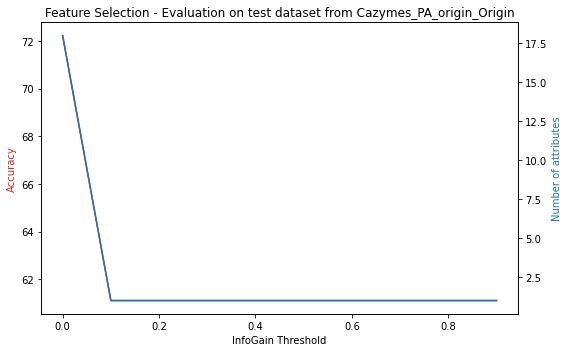

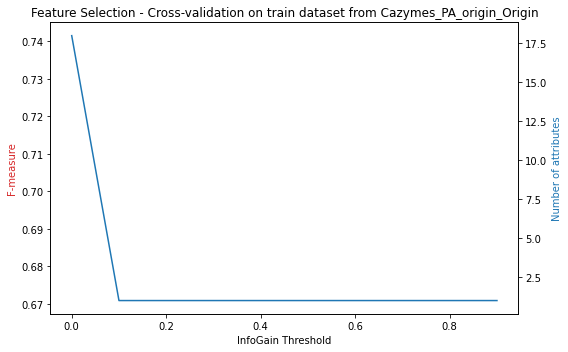


Implementing best parameters: Feature Selection
Attribute Selection by InfoGain. Threshold: 0.0
Sample size:  1256
Sample size:  18
Train size:  1004
Train size:  18
Test size:  252
Test size:  18
cross-validation
Correctly Classified Instances         736               73.3068 %
Incorrectly Classified Instances       268               26.6932 %
Kappa statistic                          0.3808
Mean absolute error                      0.3588
Root mean squared error                  0.4294
Relative absolute error                 75.5178 %
Root relative squared error             88.0959 %
Total Number of Instances             1004     

test
Correctly Classified Instances         182               72.2222 %
Incorrectly Classified Instances        70               27.7778 %
Kappa statistic                          0.3611
Mean absolute error                      0.3707
Root mean squared error                  0.4418
Relative absolute error                 77.9492 %
Root relative squared err

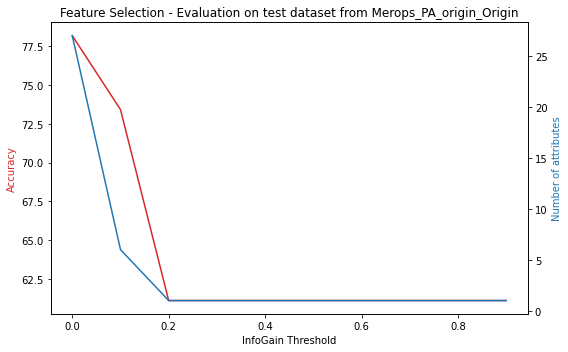

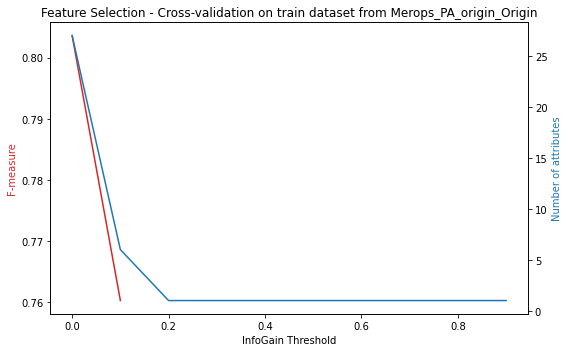


Implementing best parameters: Feature Selection
Attribute Selection by InfoGain. Threshold: 0.0
Sample size:  1256
Sample size:  27
Train size:  1004
Train size:  27
Test size:  252
Test size:  27
cross-validation
Correctly Classified Instances         813               80.9761 %
Incorrectly Classified Instances       191               19.0239 %
Kappa statistic                          0.5814
Mean absolute error                      0.2753
Root mean squared error                  0.3878
Relative absolute error                 57.9404 %
Root relative squared error             79.5645 %
Total Number of Instances             1004     

test
Correctly Classified Instances         194               76.9841 %
Incorrectly Classified Instances        58               23.0159 %
Kappa statistic                          0.4892
Mean absolute error                      0.2935
Root mean squared error                  0.406 
Relative absolute error                 61.7279 %
Root relative squared err

In [33]:
# 2nd round: For getting datasets only with Flavo and binary Origin (Marine and Not marine):

if "Security_evolution_origin_flavo.csv" in os.listdir():
  df = pd.read_csv("Security_evolution_origin_flavo.csv")
  if df["Dataset"].iloc[0] == None:
    df_evolution = LoadDatasetEvolution()
  else:
    df_evolution = LoadDatasetEvolution()

att_class = ["Origin"] #for origin
i=0
for file in l:
  i += 2
  for class_ in att_class:
    name_file = str(file).split(".")[0] + "_FS.csv" #future file name of the output
    print("========== New dataset ==========")
    print("Dataset: " + str(file) +", Class: " + str(class_) + ", i: "+ str(i))
    if file in os.listdir(): #check if file exists in folder
      data, name_dataset = LoadDataset(file, i)
      data = FirstPreprocessing(data, i, class_)
      data = SecondPreprocessing(data, i, class_)
      data = SelectClass(data)
      data = LoaderSubsetEval(data, i, name_dataset, class_) 
      if name_file in os.listdir(): #check if output was already created
        try:
          print(name_file + " already created.")
          optimal = GetOptimal(i)
        except:
          d2, d3_f, optimal = SelectionOptimalParam(data, i, class_)
          PlotOptimalParam(d2, class_)
          PlotOptimalParamFMeasure(d3_f, class_)
      else:
        d2, d3_f, optimal = SelectionOptimalParam(data, i, class_)
        PlotOptimalParam(d2, class_)
        PlotOptimalParamFMeasure(d3_f, class_)
      data, evlTest, cls, pred_output = ImplementFeatureSelection(data, optimal, i)
      #SaveFinaldf(data, name_dataset, class_)
      df_evolution.to_csv("Security_evolution_origin_flavo.csv", index=False)

In [ ]:
# First round - Feature selection for Genus class

if "Security_evolution.csv" in os.listdir():
  df = pd.read_csv("Security_evolution.csv")
  if df["Dataset"].iloc[0] == None:
    df_evolution = LoadDatasetEvolution()
  else:
    df_evolution = LoadDatasetEvolution()

i=0
att_class = ["Family"]

for file in l:
  i += 2
  for class_ in att_class:
    name_file = str(file).split(".")[0] + "_" + class_ + "_FS.csv" #future file name of the output
    print("========== New dataset ==========")
    print("Dataset: " + str(file) +", Class: " + str(class_) + ", i: "+ str(i))
    if file in os.listdir(): #check if file exists in folder
      print(file)
      data, name_dataset = LoadDataset(file, i)
      data = FirstPreprocessing(data, i, class_)
      data = SecondPreprocessing(data, i, class_)
      data = SelectClass(data)
      data = LoaderSubsetEval(data, i, name_dataset, class_) 
      try:
          optimal = GetOptimal(i)
          print(name_file + " already created.")
      except:
          d2, d3_f, optimal = SelectionOptimalParam(data, i, class_)
          PlotOptimalParam(d2, class_)
          PlotOptimalParamFMeasure(d3_f, class_)
      data, evlTest, cls, pred_output = ImplementFeatureSelection(data, optimal, i)
      SaveFinaldf(data, name_dataset, class_)
      df_evolution.to_csv("Security_evolution.csv", index=False)

========== New dataset ==========
Dataset: Cazymes_PA_origin.csv, Class: MAG, i: 2
Loading dataset
Sample size:  1256
Sample size:  218
Cazymes_PA_origin

Attribute to use as class: MAG
Preprocess number 1
Sample size:  1256
Sample size:  214

Preprocess number 2
Sample size:  1256
Sample size:  214

Defining last attribute as class
Classifying on:  @attribute MAG {False,True}

Attribute Selection by CfsSubsetEval


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Sample size:  1256
Sample size:  12
Classifying on:  @attribute MAG {False,True}

Selecting best parameters

Threshold: 0.0
Attribute Selection by InfoGain. Threshold: 0.0
Sample size:  1256
Sample size:  12
Number of features: 1
Train size:  1004
Train size:  12
Test size:  252
Test size:  12
cross-validation
Correctly Classified Instances         772               76.8924 %
Incorrectly Classified Instances       232               23.1076 %
Kappa statistic                          0.5167
Mean absolute error                      0.3031
Root mean squared error                  0.3914
Relative absolute error                 61.9311 %
Root relative squared error             79.1203 %
Total Number of Instances             1004     

test
Correctly Classified Instances         200               79.3651 %
Incorrectly Classified Instances        52               20.6349 %
Kappa statistic                          0.5718
Mean absolute error                      0.291 
Root mean squared error   

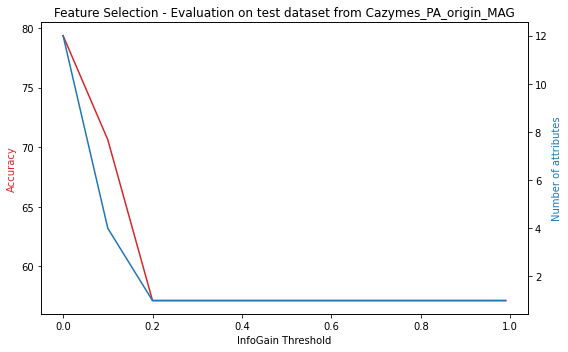

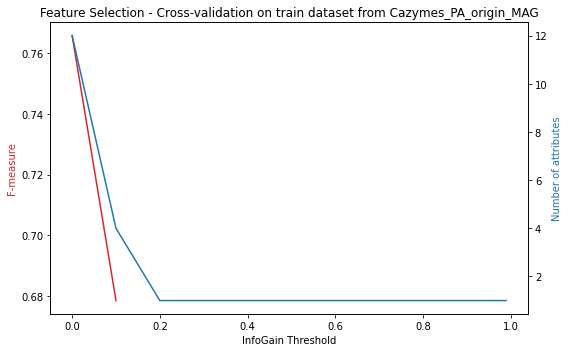


Implementing best parameters: Feature Selection
Attribute Selection by InfoGain. Threshold: 0.0
Sample size:  1256
Sample size:  12
Train size:  1004
Train size:  12
Test size:  252
Test size:  12
cross-validation
Correctly Classified Instances         773               76.992  %
Incorrectly Classified Instances       231               23.008  %
Kappa statistic                          0.5189
Mean absolute error                      0.3037
Root mean squared error                  0.3921
Relative absolute error                 62.0566 %
Root relative squared error             79.2632 %
Total Number of Instances             1004     

test
Correctly Classified Instances         200               79.3651 %
Incorrectly Classified Instances        52               20.6349 %
Kappa statistic                          0.5718
Mean absolute error                      0.2911
Root mean squared error                  0.3732
Relative absolute error                 59.4142 %
Root relative squared err

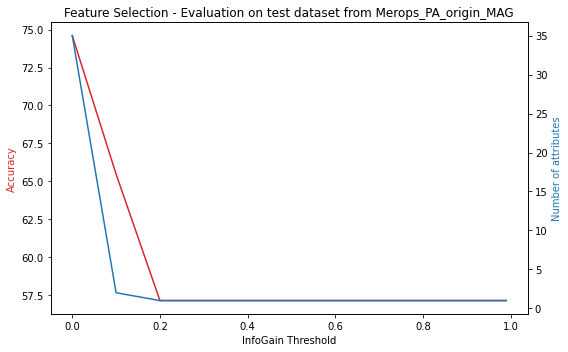

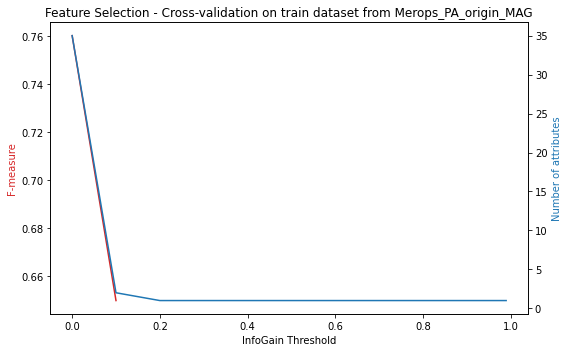


Implementing best parameters: Feature Selection
Attribute Selection by InfoGain. Threshold: 0.0
Sample size:  1256
Sample size:  35
Train size:  1004
Train size:  35
Test size:  252
Test size:  35
cross-validation
Correctly Classified Instances         762               75.8964 %
Incorrectly Classified Instances       242               24.1036 %
Kappa statistic                          0.5206
Mean absolute error                      0.3106
Root mean squared error                  0.4015
Relative absolute error                 63.4683 %
Root relative squared error             81.1638 %
Total Number of Instances             1004     

test
Correctly Classified Instances         186               73.8095 %
Incorrectly Classified Instances        66               26.1905 %
Kappa statistic                          0.4832
Mean absolute error                      0.3244
Root mean squared error                  0.4117
Relative absolute error                 66.2209 %
Root relative squared err

In [31]:
# 3rd round: For getting datasets only with Flavo and MAG attribute (True or False:

df_evolution = LoadDatasetEvolution()

att_class = ["MAG"] #for origin
i=0
for file in l:
  i += 2
  for class_ in att_class:
    name_file = str(file).split(".")[0] + "_FS.csv" #future file name of the output
    print("========== New dataset ==========")
    print("Dataset: " + str(file) +", Class: " + str(class_) + ", i: "+ str(i))
    if file in os.listdir(): #check if file exists in folder
      data, name_dataset = LoadDataset(file, i)
      data = FirstPreprocessing(data, i, class_)
      data = SecondPreprocessing(data, i, class_)
      data = SelectClass(data)
      data = LoaderSubsetEval(data, i, name_dataset, class_) 
      if name_file in os.listdir(): #check if output was already created
        try:
          print(name_file + " already created.")
          optimal = GetOptimal(i)
        except:
          d2, d3_f, optimal = SelectionOptimalParam(data, i, class_)
          PlotOptimalParam(d2, class_)
          PlotOptimalParamFMeasure(d3_f, class_)
      else:
        d2, d3_f, optimal = SelectionOptimalParam(data, i, class_)
        PlotOptimalParam(d2, class_)
        PlotOptimalParamFMeasure(d3_f, class_)
      data, evlTest, cls, pred_output = ImplementFeatureSelection(data, optimal, i)
      #SaveFinaldf(data, name_dataset, class_)
      df_evolution.to_csv("Security_evolution_flavo_mag.csv", index=False)

In [ ]:
import os
l_1porf = []
l_origin_1porf = []
l_origin_flavo_1porf = []
l_flavo_1porf = []

for file in os.listdir():
  if "_1porf" in file and ".csv" in file and "Dataset" not in file and "Security" not in file and "f_measure" not in file and "FS" not in file and "Feature_selection" not in file and "origin" not in file and "SubsetEval" not in file and "flavo" not in file:
    l_1porf.append(file)
  elif "_1porf" in file and  ".csv" in file and "origin" in file and "flavo" not in file and "Dataset" not in file and "Security" not in file and "f_measure" not in file and "FS" not in file and "Feature_selection" not in file and "flavo" not in file and "SubsetEval" not in file:
    l_origin_1porf.append(file)
  elif "_1porf" in file and  ".csv" in file and "origin" in file and "Dataset" not in file and "Security" not in file and "f_measure" not in file and "FS" not in file and "Feature_selection" not in file and "SubsetEval" not in file:
    l_origin_flavo_1porf.append(file)
  elif "_1porf" in file and ".csv" in file and "flavo" in file and "Dataset" not in file and "Security" not in file and "f_measure" not in file and "FS" not in file and "Feature_selection" not in file and "SubsetEval" not in file:
    l_flavo_1porf.append(file)